In [1]:
from os import getenv
import snowflake.connector
import pandas as pd
import matplotlib.pyplot as plt
import math

In [2]:
config_snowflake = {
    'user': getenv('SNOW_USER'),
    'password': getenv('SNOW_PASSWORD'),
    'account': getenv('SNOW_ACCOUNT'),
    'schema': 'CLEAN',
    'database': 'INSTACART_DB',}
snowflakecnx = snowflake.connector.connect(**config_snowflake)
snowflakecursor = snowflakecnx.cursor()
print('Connected to Snowflake')

Connected to Snowflake


Extracción de todos los datos 

In [3]:
snowflakecursor.execute('SELECT * FROM DIM_PRODUCTO')
dim_producto = pd.DataFrame(snowflakecursor.fetchall(), columns=[x[0] for x in snowflakecursor.description])
snowflakecursor.execute('SELECT * FROM FCT_ORDERS')
fct_orders= pd.DataFrame(snowflakecursor.fetchall(), columns=[x[0] for x in snowflakecursor.description])
snowflakecursor.execute('SELECT * FROM FCT_ORDERS_PRODUCTO')
fct_orders_producto = pd.DataFrame(snowflakecursor.fetchall(), columns=[x[0] for x in snowflakecursor.description])
print('Dataframes created')
print(dim_producto.info())
print(dim_producto.head())
print(fct_orders.info())
print(fct_orders.head())
print(fct_orders_producto.info())
print(fct_orders_producto.head())


Dataframes created
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   PRODUCT_ID    49694 non-null  int64 
 1   PRODUCT_NAME  49694 non-null  object
 2   AISLE         49694 non-null  object
 3   DEPARTMENT    49694 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.5+ MB
None
   PRODUCT_ID                                       PRODUCT_NAME  \
0           1                         Chocolate Sandwich Cookies   
1           2                                   All-Seasons Salt   
2           3               Robust Golden Unsweetened Oolong Tea   
3           4  Smart Ones Classic Favorites Mini Rigatoni Wit...   
4           5                          Green Chile Anytime Sauce   

                        AISLE DEPARTMENT  
0               cookies cakes     snacks  
1           spices seasonings     pantry  
2                         te

1. Comportamiento de compra según día de la semana

Distribución de ordenes por día de la semana

Text(0.5, 1.0, 'Comportamiento de los pedidos por día de la semana')

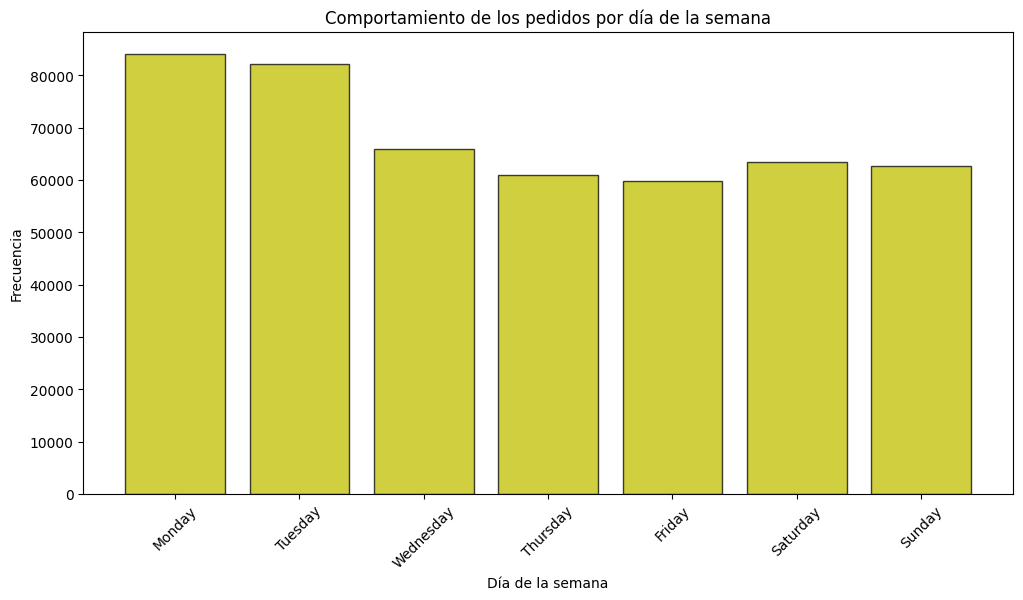

In [4]:
#Order_dow
order_dow_counts = fct_orders['ORDER_DOW'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
plt.bar(order_dow_counts.index, order_dow_counts.values, color='y', alpha=0.75, edgecolor='black')
xticks=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
plt.xticks(order_dow_counts.index, xticks, rotation=45)
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia')
plt.title('Comportamiento de los pedidos por día de la semana')

2. Comportamiento de compra según hora del día

Hora de compra y frecuencia de compras (ordenes) por hora

Index([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23],
      dtype='int64', name='ORDER_HOUR_OF_DAY')


Text(0.5, 1.0, 'Comportamiento de los pedidos por hora del día')

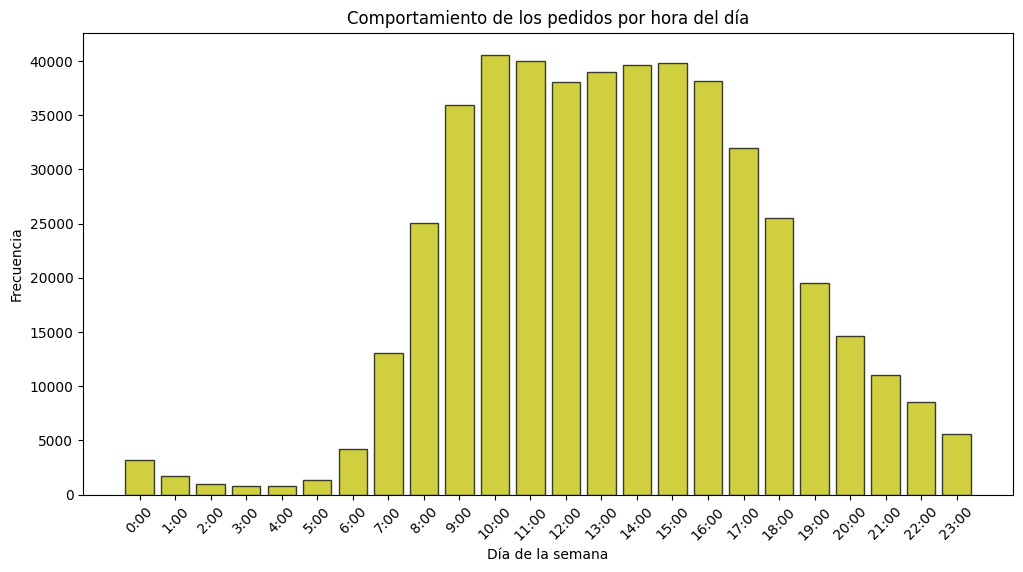

In [5]:
#Order_hour_of_day
order_hour_of_day_counts = fct_orders['ORDER_HOUR_OF_DAY'].value_counts().sort_index()
print(order_hour_of_day_counts.index)
plt.figure(figsize=(12, 6))
plt.bar(order_hour_of_day_counts.index, order_hour_of_day_counts.values, color='y', alpha=0.75, edgecolor='black')
xticks=['0:00','1:00', '2:00', '3:00', '4:00', '5:00', '6:00', '7:00', '8:00', '9:00', '10:00', '11:00', '12:00', '13:00', '14:00', '15:00', '16:00', '17:00', '18:00', '19:00', '20:00', '21:00', '22:00', '23:00']
plt.xticks(order_hour_of_day_counts.index, xticks, rotation=45)
plt.xlabel('Día de la semana')
plt.ylabel('Frecuencia')
plt.title('Comportamiento de los pedidos por hora del día')

3. Comportamiento según hora del día y día de la semana

In [6]:
hour_dow_counts=fct_orders.groupby(['ORDER_HOUR_OF_DAY', 'ORDER_DOW']).size().unstack()
print(hour_dow_counts.head())
#Día 0 (lunes), todas las horas
print(hour_dow_counts[0])
#Hora 0 (0:00), todos los días
print(hour_dow_counts.loc[0])

ORDER_DOW            0    1    2    3    4    5    6
ORDER_HOUR_OF_DAY                                   
0                  533  565  462  373  324  459  464
1                  337  269  240  215  229  219  254
2                  188  145  136  106  114  123  177
3                  128  104  104  101  109   99  125
4                  108  104  109  108  100  118  118
ORDER_HOUR_OF_DAY
0      533
1      337
2      188
3      128
4      108
5      171
6      463
7     1752
8     3908
9     5650
10    6978
11    7186
12    7231
13    7483
14    7533
15    7585
16    6956
17    5552
18    4142
19    3084
20    2544
21    2043
22    1614
23     921
Name: 0, dtype: int64
ORDER_DOW
0    533
1    565
2    462
3    373
4    324
5    459
6    464
Name: 0, dtype: int64


Text(0.5, 1.0, 'Comportamiento de los pedidos por hora del día en lunes')

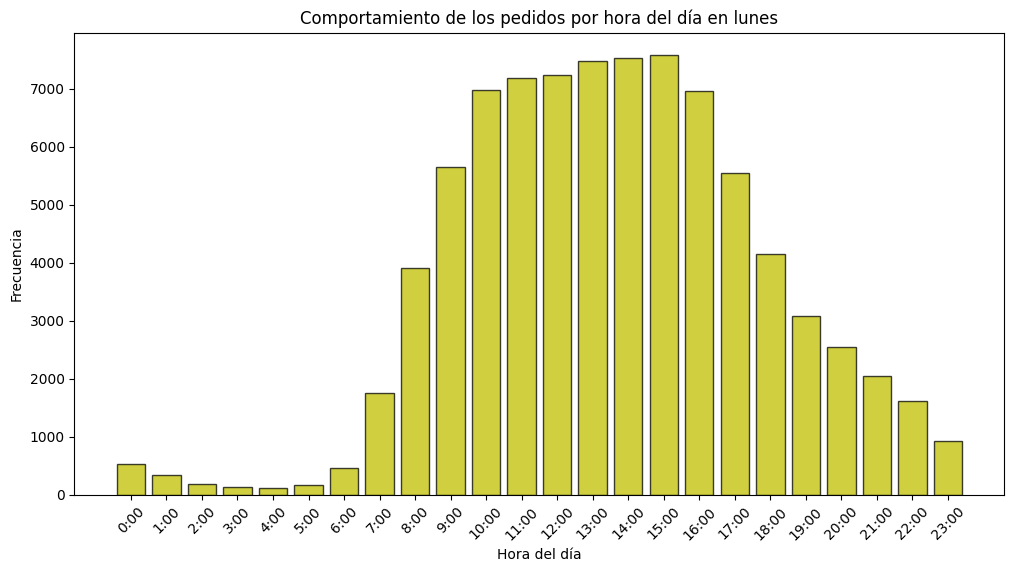

In [7]:
#Compras por hora lunes
plt.figure(figsize=(12, 6))
plt.bar(hour_dow_counts.index, hour_dow_counts[0].values, color='y', alpha=0.75, edgecolor='black')
plt.xticks(hour_dow_counts.index, xticks, rotation=45)
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.title('Comportamiento de los pedidos por hora del día en lunes')

Text(0.5, 1.0, 'Comportamiento de los pedidos por hora del día en martes')

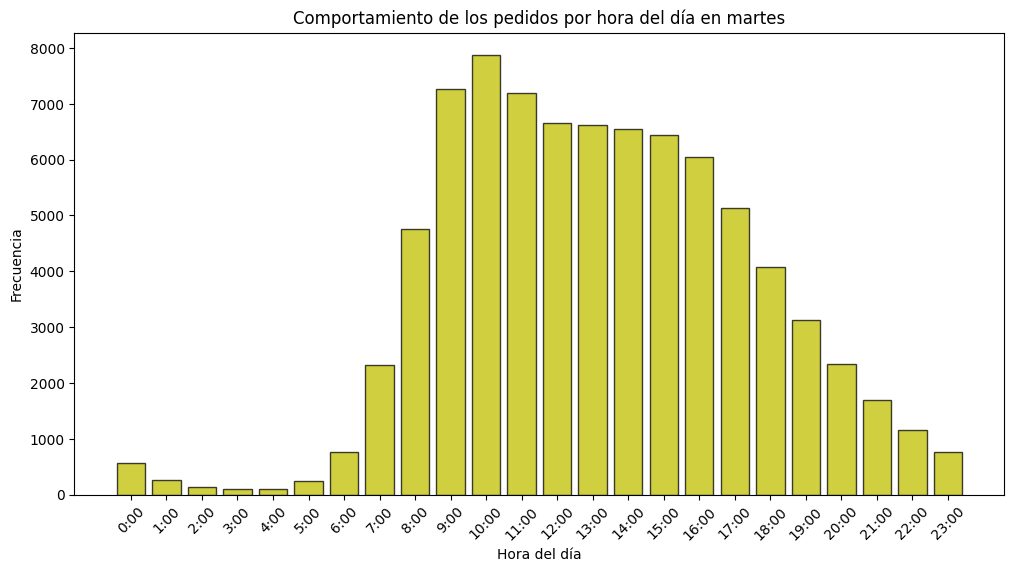

In [8]:
#Compras por hora martes
plt.figure(figsize=(12, 6))
plt.bar(hour_dow_counts.index, hour_dow_counts[1].values, color='y', alpha=0.75, edgecolor='black')
plt.xticks(hour_dow_counts.index, xticks, rotation=45)
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.title('Comportamiento de los pedidos por hora del día en martes')

Text(0.5, 1.0, 'Comportamiento de los pedidos por hora del día en miércoles')

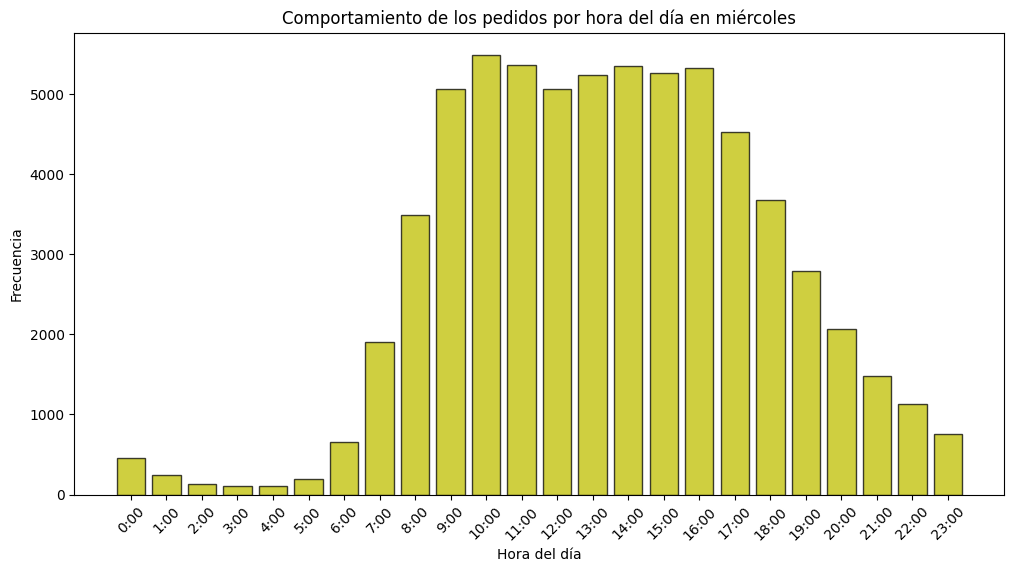

In [9]:
#Compras por hora miércoles
plt.figure(figsize=(12, 6))
plt.bar(hour_dow_counts.index, hour_dow_counts[2].values, color='y', alpha=0.75, edgecolor='black')
plt.xticks(hour_dow_counts.index, xticks, rotation=45)
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.title('Comportamiento de los pedidos por hora del día en miércoles')

Text(0.5, 1.0, 'Comportamiento de los pedidos por hora del día en jueves')

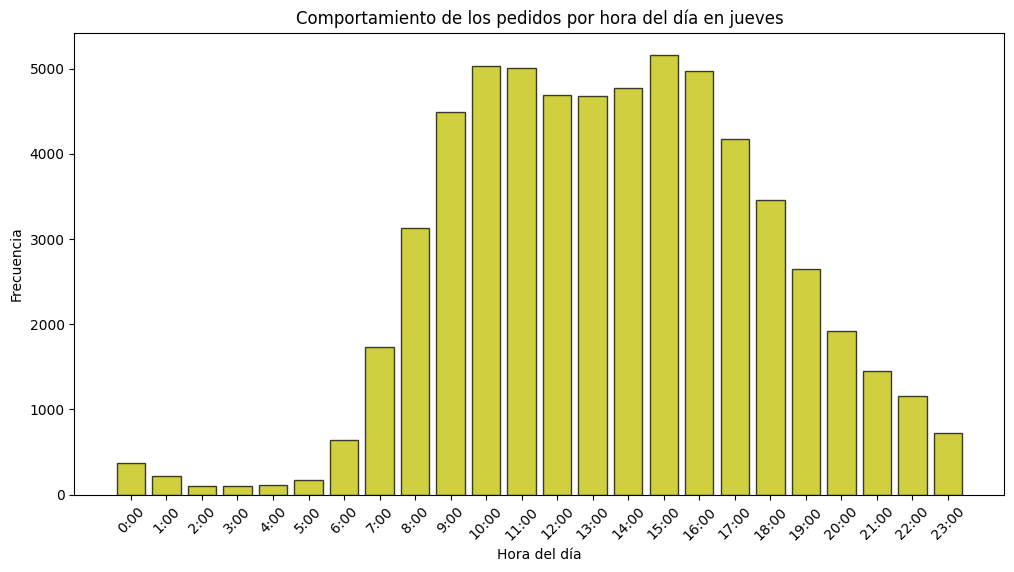

In [10]:
#Compras por hora jueves
plt.figure(figsize=(12, 6))
plt.bar(hour_dow_counts.index, hour_dow_counts[3].values, color='y', alpha=0.75, edgecolor='black')
plt.xticks(hour_dow_counts.index, xticks, rotation=45)
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.title('Comportamiento de los pedidos por hora del día en jueves')

Text(0.5, 1.0, 'Comportamiento de los pedidos por hora del día en viernes')

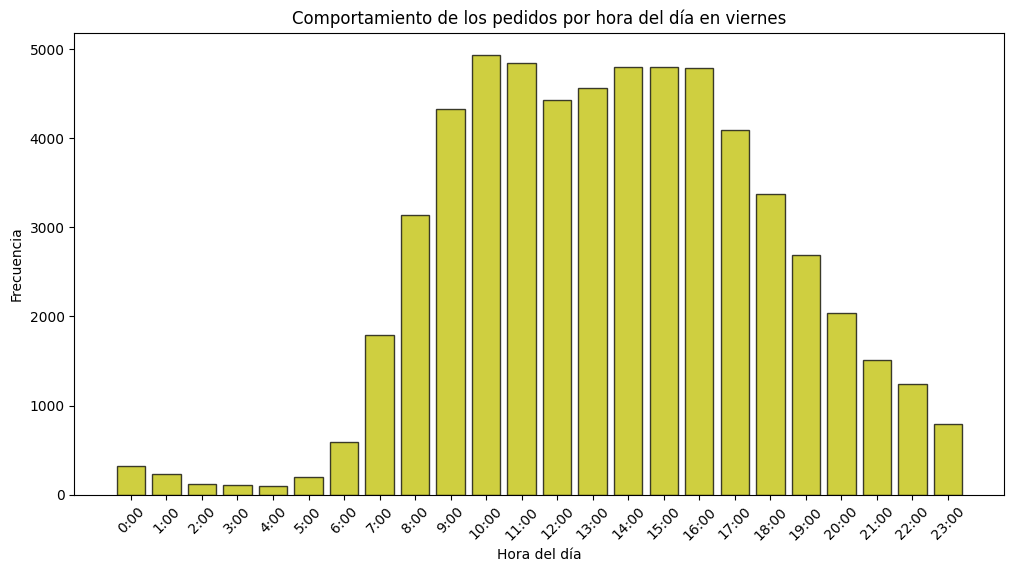

In [11]:
#Compras por hora viernes
plt.figure(figsize=(12, 6))
plt.bar(hour_dow_counts.index, hour_dow_counts[4].values, color='y', alpha=0.75, edgecolor='black')
plt.xticks(hour_dow_counts.index, xticks, rotation=45)
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.title('Comportamiento de los pedidos por hora del día en viernes')

Text(0.5, 1.0, 'Comportamiento de los pedidos por hora del día en sábado')

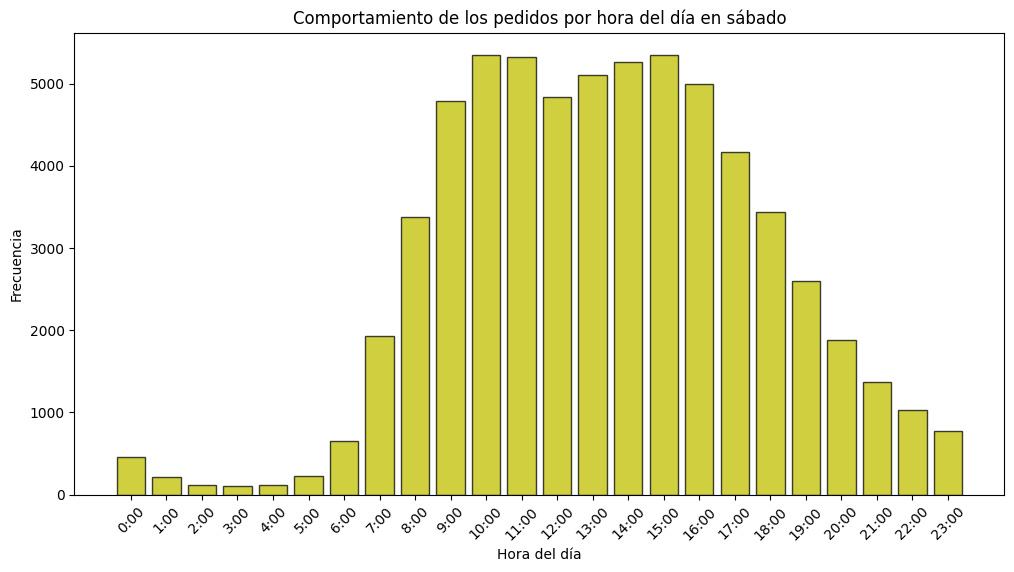

In [12]:
#Compras por hora sábado
plt.figure(figsize=(12, 6))
plt.bar(hour_dow_counts.index, hour_dow_counts[5].values, color='y', alpha=0.75, edgecolor='black')
plt.xticks(hour_dow_counts.index, xticks, rotation=45)
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.title('Comportamiento de los pedidos por hora del día en sábado')


Text(0.5, 1.0, 'Comportamiento de los pedidos por hora del día en domingo')

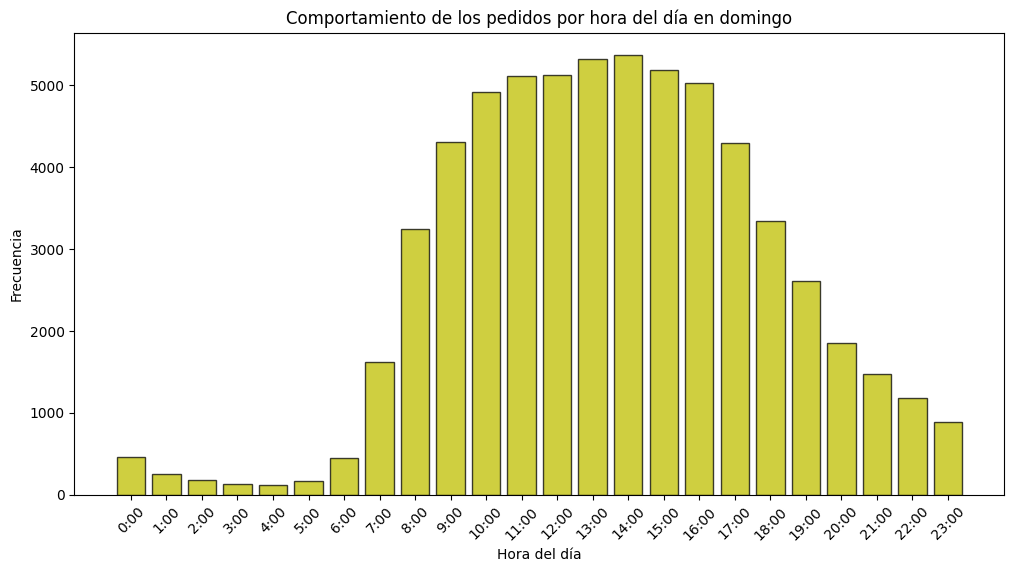

In [13]:
#Compras por hora domingo
plt.figure(figsize=(12, 6))
plt.bar(hour_dow_counts.index, hour_dow_counts[6].values, color='y', alpha=0.75, edgecolor='black')
plt.xticks(hour_dow_counts.index, xticks, rotation=45)
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.title('Comportamiento de los pedidos por hora del día en domingo')

Los días martes existe una leve tendencia de comprar más temprano en la mañana.

4. Distribución de las órdenes hechas por los clientes

¿Hay clientes que hacen más órdenes que otros? ¿Cuántas órdenes hace un cliente en promedio?


Promedio de ordenes por cliente

In [14]:
fct_orders_count_cliente = fct_orders['USER_ID'].value_counts().sort_values(ascending=False)
print("Promedio de compras por cliente: ", fct_orders_count_cliente.mean())
print("Mayor número de compras por cliente: ", fct_orders_count_cliente.max())
print("Menor número de compras por cliente: ", fct_orders_count_cliente.min())

Promedio de compras por cliente:  3.042181952145938
Mayor número de compras por cliente:  28
Menor número de compras por cliente:  1


C:\Users\erics\AppData\Local\Temp\ipykernel_1508\2706888692.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  fct_orders_count_cliente_grouped = fct_orders_count_cliente.groupby(pd.cut(fct_orders_count_cliente, rangos)).count()


Text(0.5, 1.0, 'Distribución del número de compras por cliente')

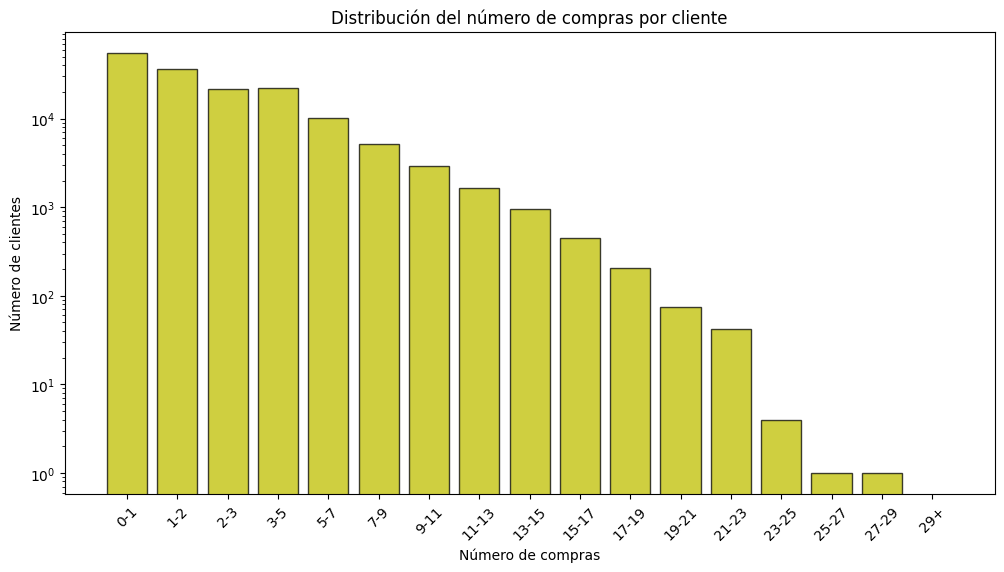

In [15]:
#Agrupar los clientes en un grupo de 10 y contar cuantos clientes hay en cada grupo
#0-3,3-10,10-15,15-25,más de 25
rangos1=[0,1,2]
rangos2=[i for i in range(3, 30,2)]
rangos=rangos1+rangos2
rangos.append(math.inf)
fct_orders_count_cliente_grouped = fct_orders_count_cliente.groupby(pd.cut(fct_orders_count_cliente, rangos)).count()
xticks=[str(int(i.left))+'-'+str(int(i.right)) if i.right!=math.inf else str(int(i.left))+'+'for i in fct_orders_count_cliente_grouped.index ]
plt.figure(figsize=(12, 6))
plt.bar(xticks, fct_orders_count_cliente_grouped.values, color='y', alpha=0.75, edgecolor='black')
plt.xticks(xticks, rotation=45)
plt.xlabel('Número de compras')
plt.ylabel('Número de clientes')
plt.yscale('log')
plt.title('Distribución del número de compras por cliente')


5. Top 20 productos más frecuentes de las ordenes

In [16]:
#Verificar que no existan ordenes donde se ordena más de una vez el mismo producto
productos_misma_orden = fct_orders_producto[fct_orders_producto.duplicated(subset=['ORDER_ID', 'PRODUCT_ID'], keep=False)]
print(productos_misma_orden)

Empty DataFrame
Columns: [ORDER_ID, PRODUCT_ID, ADD_TO_CART_ORDER, REORDERED]
Index: []


Como no hay que realizar una validación adicional por si un usuario toma dos veces el mismo produccto (y solamente enumerarlo como uno en el análisis de productos frecuentes), se procede a analizar las frecuencias.

In [17]:
fct_orders_producto_count_producto = fct_orders_producto['PRODUCT_ID'].value_counts().sort_values(ascending=False)
productos_top_20=fct_orders_producto_count_producto.head(20)
xticks=[dim_producto.loc[dim_producto['PRODUCT_ID']==i]['PRODUCT_NAME'].values[0] for i in productos_top_20.index]
print("Número de ordenes de cada producto de los 20 más vendidos: \n\n",pd.Series(productos_top_20.values, index=xticks))

Número de ordenes de cada producto de los 20 más vendidos: 

 Banana                      66050
Bag of Organic Bananas      53297
Organic Strawberries        37039
Organic Baby Spinach        33971
Organic Hass Avocado        29773
Organic Avocado             24689
Large Lemon                 21495
Strawberries                20018
Limes                       19690
Organic Whole Milk          19600
Organic Raspberries         19197
Organic Yellow Onion        15898
Organic Garlic              15292
Organic Zucchini            14584
Organic Blueberries         13879
Cucumber Kirby              13675
Organic Fuji Apple          12544
Organic Lemon               12232
Apple Honeycrisp Organic    11993
Organic Grape Tomatoes      11781
dtype: int64


Text(0.5, 1.0, 'Top 20 de productos más vendidos')

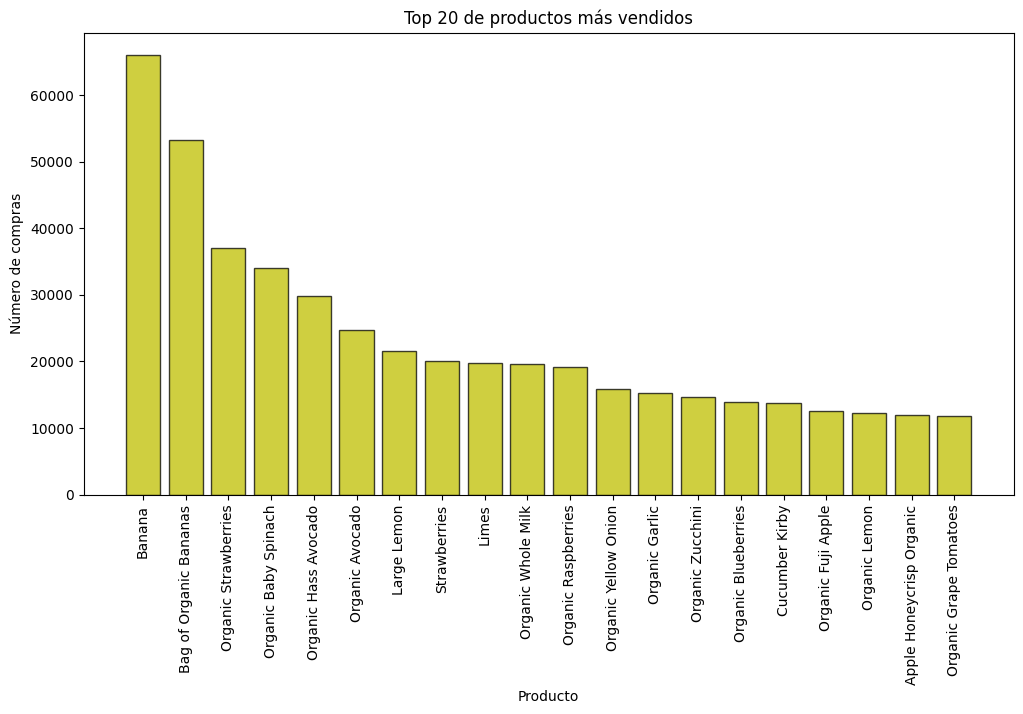

In [18]:
plt.figure(figsize=(12, 6))
plt.bar(xticks, productos_top_20.values, color='y', alpha=0.75, edgecolor='black')
plt.xticks(xticks, rotation=90)
plt.xlabel('Producto')
plt.ylabel('Número de compras')
plt.title('Top 20 de productos más vendidos')

6. Número de artículos que se compran en un pedido

In [19]:
numero_articulos_pedido=fct_orders_producto.groupby('ORDER_ID').size()
print("Promedio de artículos por pedido: ", numero_articulos_pedido.mean())
print("Mayor número de artículos por pedido: ", numero_articulos_pedido.max())
print("Menor número de artículos por pedido: ", numero_articulos_pedido.min())

Promedio de artículos por pedido:  10.098983215049127
Mayor número de artículos por pedido:  127
Menor número de artículos por pedido:  1


C:\Users\erics\AppData\Local\Temp\ipykernel_1508\1027208204.py:7: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  numero_articulos_pedido_grouped = numero_articulos_pedido.groupby(pd.cut(numero_articulos_pedido, rangos)).count()


Text(0.5, 1.0, 'Distribución del número de compras por cliente')

<Figure size 1200x600 with 0 Axes>

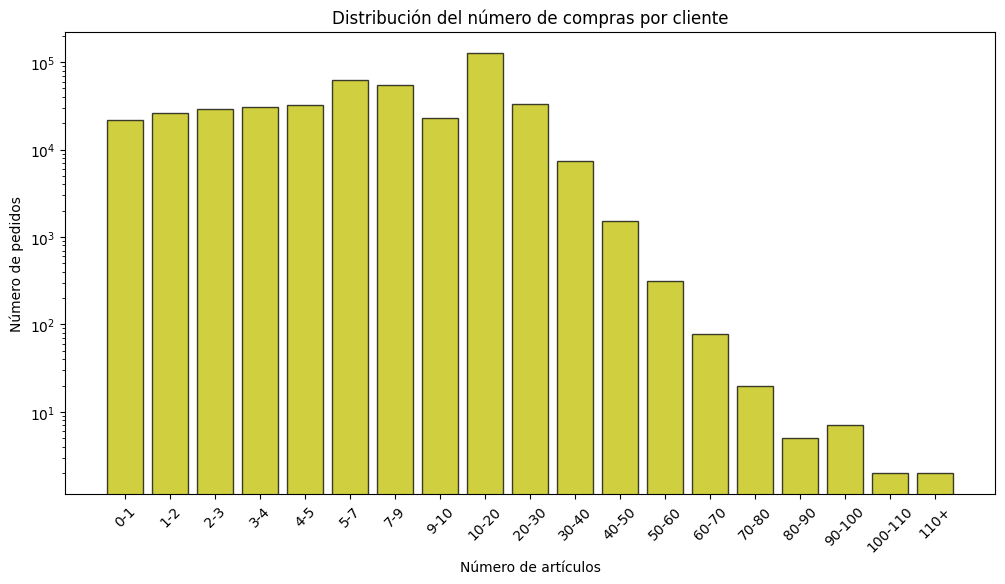

In [20]:

plt.figure(figsize=(12, 6))
rangos1=[0,1,2,3,4]
rangos2=[i for i in range(5,10,2)]
rangos3=[i for i in range(10, 120,10)]
rangos=rangos1+rangos2+rangos3
rangos.append(math.inf)
numero_articulos_pedido_grouped = numero_articulos_pedido.groupby(pd.cut(numero_articulos_pedido, rangos)).count()
xticks=[str(int(i.left))+'-'+str(int(i.right)) if i.right!=math.inf else str(int(i.left))+'+'for i in numero_articulos_pedido_grouped.index ]
plt.figure(figsize=(12, 6))
plt.bar(xticks, numero_articulos_pedido_grouped.values, color='y', alpha=0.75, edgecolor='black')
plt.xticks(xticks, rotation=45)
plt.xlabel('Número de artículos')
plt.ylabel('Número de pedidos')
plt.yscale('log')
plt.title('Distribución del número de compras por cliente')

7. Top 20 artículos que se vuelven a pedir con más frecuencia
Productos con mayor índice de reordered.

In [21]:
articulos_reordenados=fct_orders_producto[fct_orders_producto['REORDERED']==True]
articulos_reordenados_count_producto = articulos_reordenados['PRODUCT_ID'].value_counts().sort_values(ascending=False)
#Top 20 de productos más reordenados
articulos_reordenados_top_20=articulos_reordenados_count_producto.head(20)
xticks=[dim_producto.loc[dim_producto['PRODUCT_ID']==i]['PRODUCT_NAME'].values[0] for i in articulos_reordenados_top_20.index]
print("Número de reordenaciones de cada producto de los 20 más reordenados: \n\n",pd.Series(articulos_reordenados_top_20.values, index=xticks))

Número de reordenaciones de cada producto de los 20 más reordenados: 

 Banana                      55763
Bag of Organic Bananas      44450
Organic Strawberries        28639
Organic Baby Spinach        26233
Organic Hass Avocado        23629
Organic Avocado             18743
Organic Whole Milk          16251
Large Lemon                 15044
Organic Raspberries         14748
Strawberries                13945
Limes                       13327
Organic Yellow Onion        11145
Organic Garlic              10411
Organic Zucchini            10076
Cucumber Kirby               9538
Organic Fuji Apple           8989
Apple Honeycrisp Organic     8836
Organic Blueberries          8799
Organic Lemon                8412
Organic Half & Half          8389
dtype: int64


Text(0.5, 1.0, 'Top 20 de productos más reordenados')

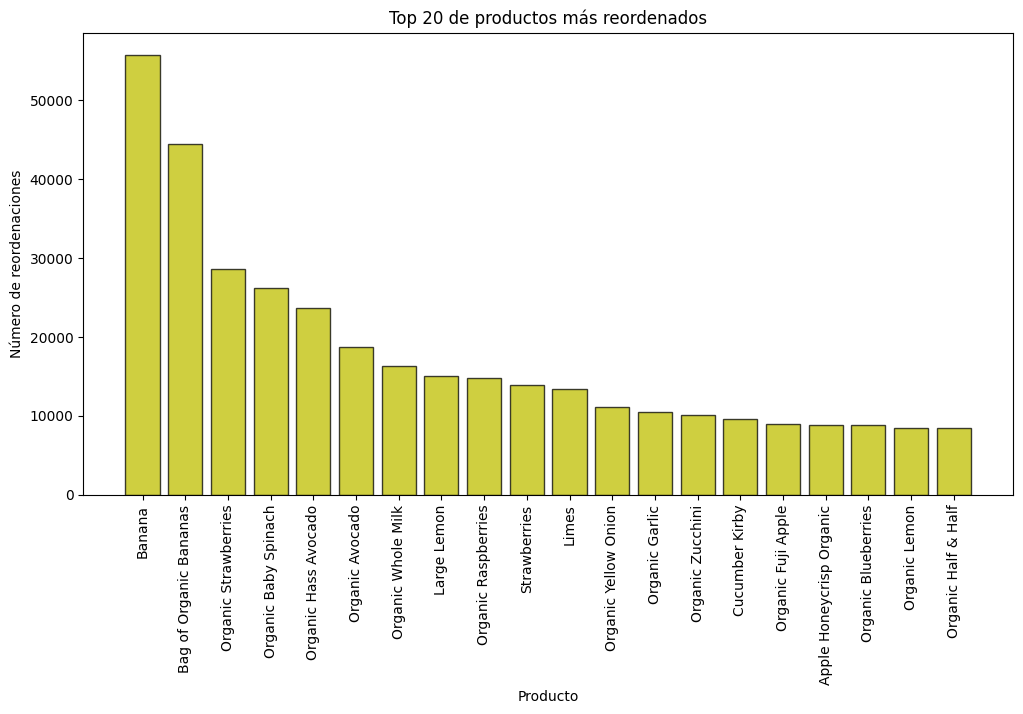

In [22]:
plt.figure(figsize=(12, 6))
plt.bar(xticks, articulos_reordenados_top_20.values, color='y', alpha=0.75, edgecolor='black')
plt.xticks(xticks, rotation=90)
plt.xlabel('Producto')
plt.ylabel('Número de reordenaciones')
plt.title('Top 20 de productos más reordenados')

8. Proporción de pedidos que se vuelven a pedir para cada producto


In [23]:
prod_reordenados_count = fct_orders_producto[fct_orders_producto['REORDERED']==True]['PRODUCT_ID'].value_counts().sort_values(ascending=False)
prod_pedidos_count = fct_orders_producto['PRODUCT_ID'].value_counts().sort_values(ascending=False)
prop_reordenado_pedido=prod_reordenados_count/prod_pedidos_count
prop_reordenado_pedido=prop_reordenado_pedido.fillna(0) #Se llenan los NaN con 0. Las NaN se debe a la división por 0 al calcular la proporción
#cuando no hay pedidos de un producto
prop_reordenado_pedido=prop_reordenado_pedido
print("Proporción de reordenaciones de cada producto respecto al total de pedidos: \n\n",prop_reordenado_pedido)


Proporción de reordenaciones de cada producto respecto al total de pedidos: 

 PRODUCT_ID
1        0.564286
2        0.000000
3        0.738095
4        0.510204
7        0.500000
           ...   
49690    0.800000
49691    0.430556
49692    0.416667
49693    0.440000
49694    0.333333
Name: count, Length: 45573, dtype: float64


9. Proporción de productos pedidos que se vuelven a pedir para cada cliente

In [24]:
merged_productos_usuario=pd.merge(fct_orders_producto, fct_orders, on='ORDER_ID')
# Agrupar por USER_ID y obtener la lista de productos únicos
productos_usuario_unique = merged_productos_usuario.groupby('USER_ID')['PRODUCT_ID'].apply(lambda x: list(set(x))).reset_index()
# Primero, agrupar por USER_ID y contar cuántas veces se ha comprado cada PRODUCT_ID
productos_count = merged_productos_usuario.groupby(['USER_ID', 'PRODUCT_ID']).size().reset_index(name='COUNT')
productos_count_reordered= merged_productos_usuario[merged_productos_usuario['REORDERED']==True].groupby(['USER_ID', 'PRODUCT_ID']).size().reset_index(name='COUNT_REO')
#merge a la izquierda para que se mantengan los productos que no han sido reordenados
productos_usuarios_count=pd.merge(productos_count, productos_count_reordered, on=['USER_ID', 'PRODUCT_ID'], how='left')
#llenar los NaN con 0. NaN son los productos que no han sido reordenados nunca por un usuario
productos_usuarios_count['COUNT_REO']=productos_usuarios_count['COUNT_REO'].fillna(0)
#Transformar la columna COUNT_REO a entero
productos_usuarios_count['COUNT_REO']=productos_usuarios_count['COUNT_REO'].astype(int)
#Calcular la proporción de reordenaciones de cada producto por usuario
productos_usuarios_count['PROP_REO']=productos_usuarios_count['COUNT_REO']/productos_usuarios_count['COUNT']
#Llenar los NaN con 0. NaN son los productos que no han sido ordenados nunca por un usuario
productos_usuarios_count['PROP_REO']=productos_usuarios_count['PROP_REO'].fillna(0)
print(productos_usuarios_count)


         USER_ID  PRODUCT_ID  COUNT  COUNT_REO  PROP_REO
0              2        9681      1          0       0.0
1              2       12000      1          0       0.0
2              2       13176      1          0       0.0
3              2       16589      1          0       0.0
4              2       20574      1          0       0.0
...          ...         ...    ...        ...       ...
3381861   206209       39216      1          0       0.0
3381862   206209       40992      1          0       0.0
3381863   206209       41213      1          1       1.0
3381864   206209       41665      1          0       0.0
3381865   206209       43961      1          0       0.0

[3381866 rows x 5 columns]


In [25]:
#Ejemplo con el usuario 13
productos_usuario_13 = productos_usuarios_count.loc[productos_usuarios_count['USER_ID'] == 13, ['PRODUCT_ID', 'COUNT', 'COUNT_REO', 'PROP_REO']]
productos_usuario_13 = productos_usuario_13.rename(columns={'PRODUCT_ID': 'PRODUCT_NAME'})
productos_usuario_13['PRODUCT_NAME'] = productos_usuario_13['PRODUCT_NAME'].apply(lambda x: dim_producto.loc[dim_producto['PRODUCT_ID']==x]['PRODUCT_NAME'].values[0])
print(productos_usuario_13.to_string(index=False))

                                    PRODUCT_NAME  COUNT  COUNT_REO  PROP_REO
                      15 Grain Whole Grain Bread      1          1  1.000000
                                      Whole Milk      3          2  0.666667
                                     Cauliflower      1          1  1.000000
                            Organic Red Potatoes      1          1  1.000000
Sleepytime Vanilla Caffeine Free Herbal Tea Bags      1          0  0.000000
                                  Golden Raisins      1          1  1.000000
                             Decaf Mountain Chai      1          0  0.000000
   Fat Free Smooth & Creamy Plain Organic Yogurt      1          0  0.000000
                                 Unknown Product      1          1  1.000000
                                     Half & Half      3          2  0.666667
                   Whole Wheat Pita Bread Loaves      1          1  1.000000
                                            Leek      1          0  0.000000

 10. Top 20 artículos que la gente pone primero en el carrito

In [26]:
productos_priorizados=fct_orders_producto[fct_orders_producto['ADD_TO_CART_ORDER']==1]['PRODUCT_ID'].value_counts().sort_values(ascending=False).reset_index( name='NUMBER_OF_ORDERS')
productos_priorizados_top_20=productos_priorizados.head(20)
xticks=[dim_producto.loc[dim_producto['PRODUCT_ID']==i]['PRODUCT_NAME'].values[0] for i in productos_priorizados_top_20['PRODUCT_ID']]
print("Top 20 de productos añadidos primero al carrito: \n\n",pd.Series(productos_priorizados_top_20['NUMBER_OF_ORDERS'].values, index=xticks))


Top 20 de productos añadidos primero al carrito: 

 Banana                         15566
Bag of Organic Bananas         11028
Organic Whole Milk              4363
Organic Strawberries            3950
Organic Hass Avocado            3391
Organic Baby Spinach            3337
Organic Avocado                 3044
Spring Water                    2336
Strawberries                    2309
Organic Raspberries             2027
Sparkling Water Grapefruit      1915
Organic Half & Half             1797
Large Lemon                     1737
Soda                            1733
Organic Reduced Fat Milk        1397
Limes                           1371
Hass Avocados                   1340
Organic Reduced Fat 2% Milk     1311
Half & Half                     1309
Organic Yellow Onion            1247
dtype: int64


Text(0.5, 1.0, 'Top 20 de productos añadidos primero al carrito')

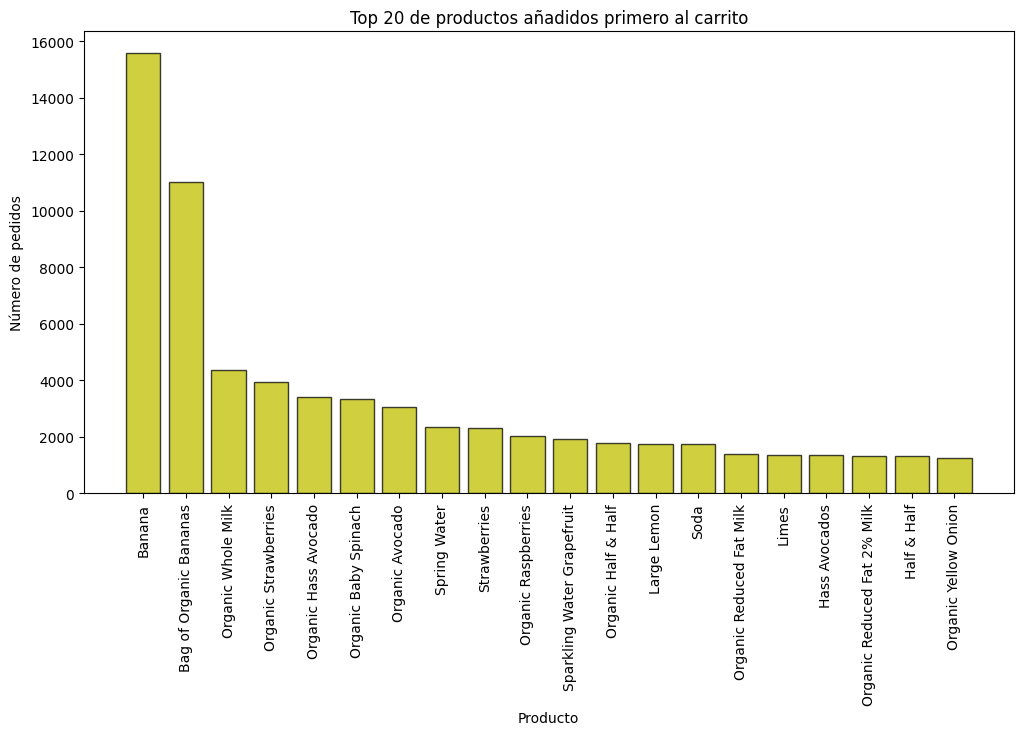

In [27]:
plt.figure(figsize=(12, 6))
plt.bar(xticks, productos_priorizados_top_20['NUMBER_OF_ORDERS'].values, color='y', alpha=0.75, edgecolor='black')
plt.xticks(xticks, rotation=90)
plt.xlabel('Producto')
plt.ylabel('Número de pedidos')
plt.title('Top 20 de productos añadidos primero al carrito')
